<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/Handlebar/03-Lstm__Handlebar_tensorflow_v1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 42

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../data/handlebar/processed_segments_overlap_50.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [3]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 42


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_50.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'],
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)

In [5]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])

In [6]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
# train_data_scaled_df['start_time'] = train_data['start_time'].values
# train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
# test_data_scaled_df['start_time'] = test_data['start_time'].values
# test_data_scaled_df['end_time'] = test_data['end_time'].values

In [7]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   10,
       ...
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863],
      dtype='int64', length=1796)
Index([   7,   54,   63,   73,   92,   94,  119,  188,  204,  209,  218,  330,
        358,  363,  402,  412,  421,  456,  530,  553,  567,  584,  590,  597,
        757,  784,  796,  840,  891,  894,  949,  950,  955,  962,  978,  979,
        990, 1006, 1033, 1038, 1071, 1126, 1135, 1143, 1168, 1195, 1266, 1272,
       1274, 1275, 1279, 1359, 1384, 1399, 1409, 1442, 1462, 1472, 1520, 1521,
       1562, 1581, 1598, 1624, 1628, 1655, 1673, 1763],
      dtype='int64')


In [9]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [10]:
normal_train_data_scaled_lstm = np.expand_dims(normal_train_data_scaled, axis=2)
normal_test_data_scaled_lstm = np.expand_dims(normal_test_data_scaled, axis=2)
abnormal_test_data_scaled_lstm = np.expand_dims(abnormal_test_data_scaled, axis=2)
normal_train_data_scaled_lstm.shape, normal_test_data_scaled_lstm.shape, abnormal_test_data_scaled_lstm.shape

((7178, 96, 1), (1796, 96, 1), (68, 96, 1))

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

model = Sequential()
# Encoder
model.add(Input(shape=(normal_train_data_scaled_lstm.shape[1], normal_train_data_scaled_lstm.shape[2])))
model.add(LSTM(64, activation='tanh', return_sequences=False))
#not Overfitting
model.add(Dropout(rate=0.1))

model.add(RepeatVector(normal_train_data_scaled_lstm.shape[1]))

model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(rate=0.1))
model.add(TimeDistributed(Dense(normal_train_data_scaled_lstm.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 96, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 96, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# define early stopping to prevent overfit
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=10,
                                               mode="min",
                                               verbose=1,
                                               restore_best_weights=True)

In [10]:
# fit model
history = model.fit(
    normal_train_data_scaled_lstm, normal_train_data_scaled_lstm,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping],
    shuffle=False,
    verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.4586 - val_loss: 0.4522
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4536 - val_loss: 0.4499
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4524 - val_loss: 0.4495
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4521 - val_loss: 0.4496
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4520 - val_loss: 0.4496
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4519 - val_loss: 0.4496
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4519 - val_loss: 0.4495
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4520 - val_loss: 0.4494
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4519 - val_loss: 0.4495
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4518 - val_loss: 0.4498
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4520 - val_loss: 0.4496
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/ste

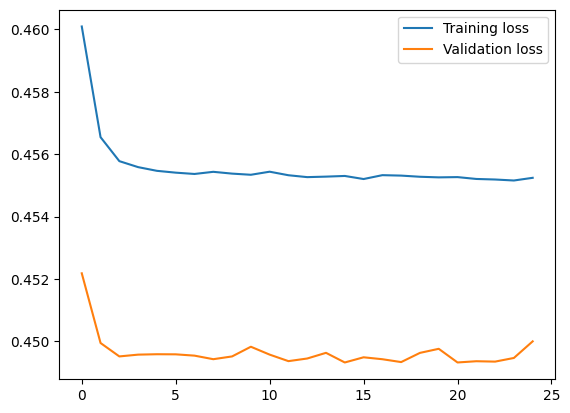

In [11]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


(array([301.,  17.,  13.,  11.,   5.,   1.,   3.,   2.,   0.,   1.,   4.,
         15.,  16.,  28.,  39.,  34.,  48.,  50.,  50.,  51.,  48.,  55.,
         49.,  46.,  32.,  35.,  36.,  28.,  18.,  12.,  16.,  13.,  12.,
          8.,   4.,   5.,   5.,   5.,   2.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([0.00855496, 0.03810525, 0.06765553, 0.09720583, 0.1267561 ,
        0.1563064 , 0.18585669, 0.21540697, 0.24495725, 0.27450755,
        0.30405784, 0.33360812, 0.3631584 , 0.39270869, 0.42225897,
        0.45180926, 0.48135954, 0.5109098 , 0.54046011, 0.57001036,
        0.59956068, 0.62911093, 0.65866125, 0.6882115 , 0.71776181,
        0.74731207, 0.77686238, 0.80641264, 0.83596295, 0.86551321,
        0.89506352, 0.92461377, 0.95416409, 0.9837144 , 1.01326466,
        1.04281497, 1.07236528, 1.10191548, 1.13146579, 1.16101611,
        1.19056642, 1.22011662, 1.24966693, 1.27921724, 1.30876756,
        1.33831775, 1.36786807, 1.39741838, 1.

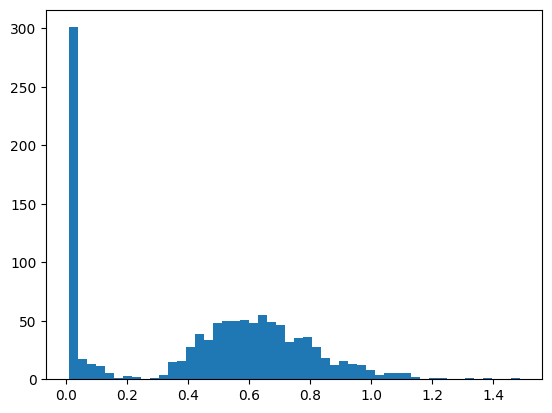

In [12]:
import tensorflow as tf #building model
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(array([1., 0., 1., 0., 2., 0., 0., 2., 2., 1., 0., 0., 2., 1., 0., 4., 0.,
        1., 1., 1., 0., 0., 0., 2., 1., 0., 2., 0., 1., 2., 2., 2., 1., 1.,
        1., 0., 1., 2., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.98478872, 1.04711747, 1.10944617, 1.17177498, 1.23410368,
        1.2964325 , 1.35876119, 1.42109001, 1.4834187 , 1.54574752,
        1.60807621, 1.67040491, 1.73273373, 1.79506254, 1.85739124,
        1.91971993, 1.98204875, 2.04437757, 2.10670614, 2.16903496,
        2.23136377, 2.29369259, 2.35602117, 2.41834998, 2.4806788 ,
        2.54300761, 2.60533619, 2.667665  , 2.72999382, 2.79232264,
        2.85465121, 2.91698003, 2.97930884, 3.04163742, 3.10396624,
        3.16629505, 3.22862363, 3.29095244, 3.35328126, 3.41561007,
        3.47793865, 3.54026747, 3.60259628, 3.6649251 , 3.72725368,
        3.78958249, 3.85191131, 3.91424012, 3.9765687 , 4.03889751,
        4.10122633]),
 <BarContainer object of 50 artists>)

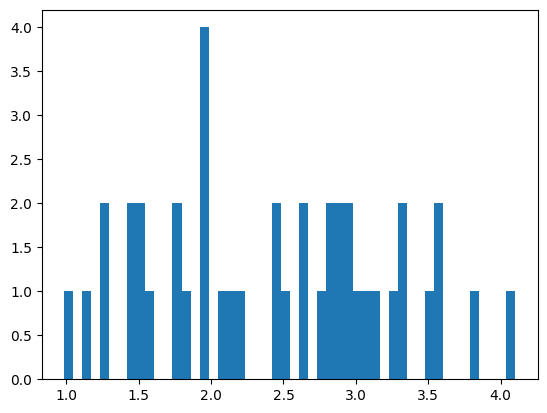

In [13]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [14]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2*np.std(train_loss)
threshold

np.float32(1.1020002)

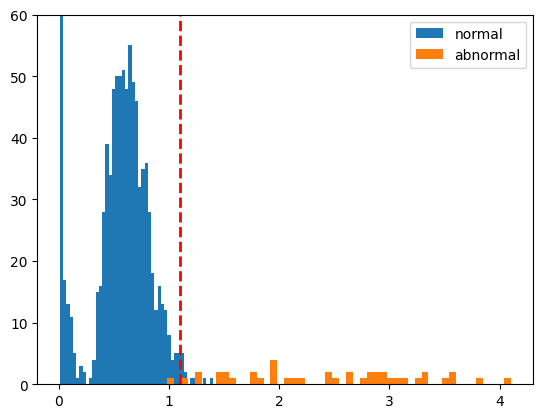

In [15]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [16]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1111
Accuracy:  0.9893143365983972
False Predictions index:  [199, 208, 470, 641, 753, 837, 855, 900, 904, 944, 980, 1009]


In [17]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  0.9761904761904762
